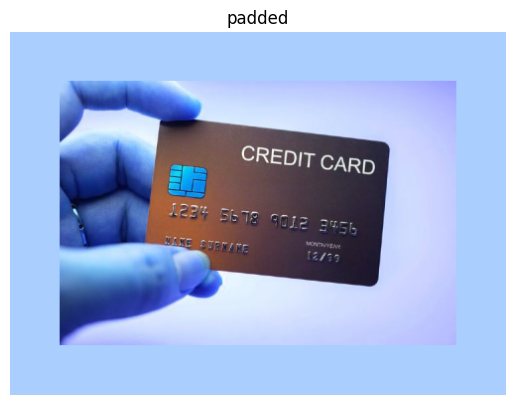

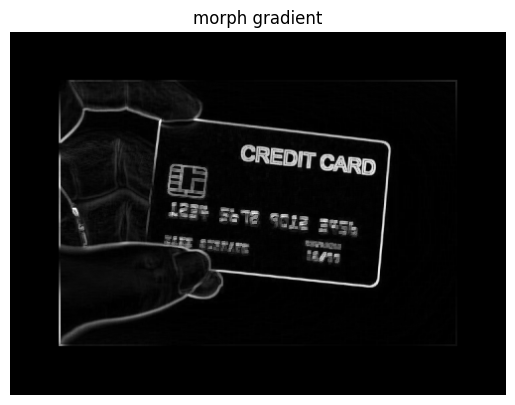

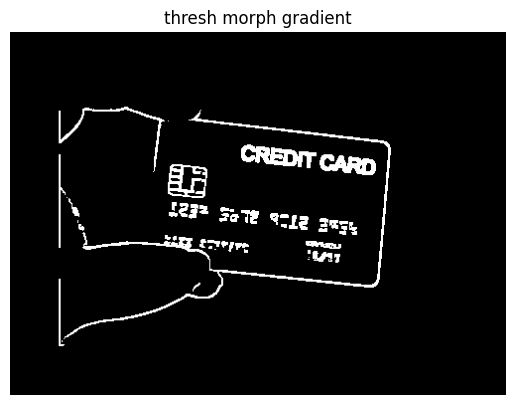

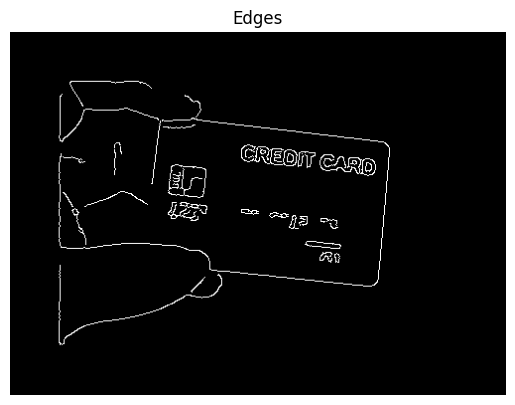

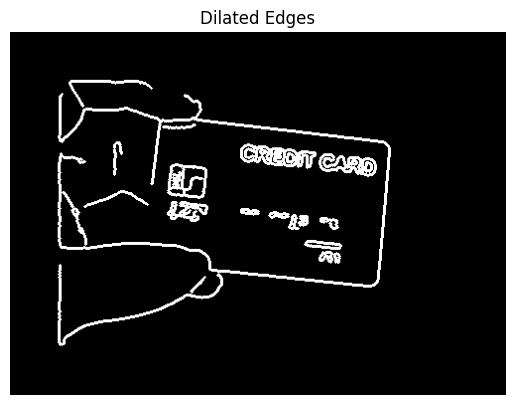

In [1098]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import math
# Load the image
def showImage(name, image, cmap=None):
    plt.imshow(image, cmap=cmap)
    plt.axis('off')  # Hide axis
    plt.title(name)
    plt.show()
def resize_image(img, target_width):
    # Read the image
    
    if img is None:
        print("Error: Image not found or unable to load.")
        return
    
    # Get the original dimensions
    height, width = img.shape[:2]
    
    # Calculate the new height to maintain the aspect ratio
    width_percent = (target_width / float(width))
    new_height = int((float(height) * float(width_percent)))
    
    # Resize the image
    new_img = cv2.resize(img, (target_width, new_height), interpolation=cv2.INTER_AREA)
    
    # Save the resized image
    return new_img

# image = cv2.imread('01 - Straightforward.jpg')
# image = cv2.imread('02 - You can do it.jpg')
# image = cv2.imread('03 - Should be okay.jpg')
# image = cv2.imread('04 - Still ok, I hope.jpg')
# image = cv2.imread('05 - Looks cool, hope it runs cool too.jpg')
# image = cv2.imread('06 - Hatetlewe7 hatlewe7.jpg')
# image = cv2.imread('08 - Ew3a soba3ak ya3am.jpg')
# image = cv2.imread('09 - El spero spathis we23et 3aaaa.jpg')
# image = cv2.imread('10 - Mal7 w Felfel.jpg')
image = cv2.imread('11 - Ya setty ew3i.jpg')###################
# image = cv2.imread('12 - weewooweewoo.jpg')
# image = cv2.imread('13 - Matozbot el camera ya Kimo.jpg')
# image = cv2.imread('14 - 2el noor 2ata3.jpg')
# image = cv2.imread('15 - Compresso Espresso.jpg')
# image = cv2.imread('16 - Sheel el kart yastaaaa.jpg')
# image = cv2.imread('07 - Hatet3eweg hat3eweg.jpg')


image=resize_image(image,400)
# Get the color of the top-left pixel
# Get the color of the top-left pixel and convert it to a tuple
# Get the color of the top-left pixel
top_left_pixel = image[0, 0]

# Convert to a tuple of integers
top_left_pixel = tuple(map(int, top_left_pixel))

# Define the padding size
pad_size = 50  # You can change this to the desired padding size

# Pad the image with the top-left pixel color
padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, 
                                  cv2.BORDER_CONSTANT, value=top_left_pixel)
showImage("padded",padded_image)

gray = cv2.cvtColor(padded_image, cv2.COLOR_BGR2GRAY)

kernel_size = (3,3)  # Width and height of the rectangle
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

# Perform dilation
dilated_image = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)
showImage("morph gradient",dilated_image,cmap="gray")

thresh2 = cv2.threshold(dilated_image, 60, 170, cv2.THRESH_BINARY)[1]
showImage("thresh morph gradient",thresh2,cmap="gray")
# Preprocess the image
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
blurred = cv2.GaussianBlur(gray, (9, 9), 0)#9x0

# Apply Canny edge detector
edges = cv2.Canny(blurred, 10, 110)

# Define a rectangular kernel for dilation
kernel_size = (3, 3)  # Adjust the size as needed
rectangular_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, kernel_size)

# Apply dilation with the rectangular kernel
dilated_edges = cv2.dilate(edges, rectangular_kernel, iterations=1)


showImage("Edges", edges, cmap='gray')
# Display the dilated edges
showImage("Dilated Edges", dilated_edges, cmap='gray')



[((241, 95), (376, 111)), ((261, 246), (364, 256)), ((371, 249), (379, 159)), ((143, 153), (151, 90))]


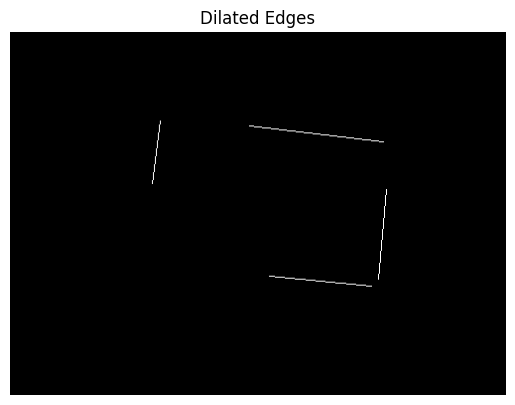

In [1099]:

# Define parameters for Hough Line Transform
rho = 1# Distance resolution in pixels of the Hough grid
theta = np.pi / 186  # Angular resolution in radians of the Hough grid
threshold = 20  # Minimum number of votes (intersections in Hough grid cell)
min_line_length = 50  # Minimum number of pixels making up a line
max_line_gap = 3  # Maximum gap in pixels between connectable line segments
line_image = np.copy(dilated_edges) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

# for line in lines:
#     for x1,y1,x2,y2 in line:
#         cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),1)

# Function to calculate line length
def line_length(line):
    x1, y1, x2, y2 = line
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Calculate lengths of all lines
line_lengths = [(line, line_length(line[0])) for line in lines]

# Sort lines based on their lengths (longest first)
line_lengths.sort(key=lambda x: x[1], reverse=True)

# Select the first 4 lines
top_lines = [line for line, length in line_lengths[:4]]

# Calculate the length of the 4th longest line to compare against
length_threshold = line_lengths[3][1] * 0.5  # Example threshold: 50% of the 4th longest line

# Filter out lines that are significantly shorter than the 4th longest line
filtered_lines = [line for line, length in line_lengths if length >= length_threshold]

# Convert lines to the desired format
formatted_lines = [((line[0][0], line[0][1]), (line[0][2], line[0][3])) for line in filtered_lines]

print(formatted_lines)

# Draw the filtered lines on the blank image
for line in formatted_lines:
    (x1, y1), (x2, y2) = line  # Unpack line correctly
    cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 1)

# Draw the lines on the  image
lines_edges = cv2.addWeighted(dilated_edges, 0.8, line_image, 1, 0)
showImage("Dilated Edges", line_image, cmap='gray')


Extended lines: [((0, 66), (500, 125)), ((0, 220), (500, 269)), ((393, 0), (360, 366)), ((162, 0), (115, 366))]


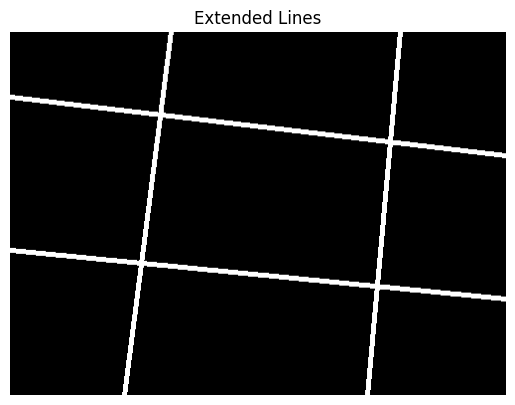

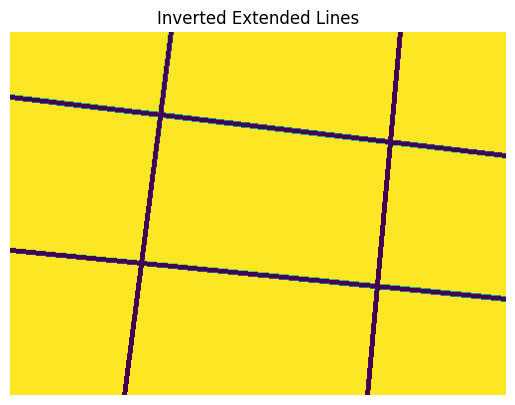

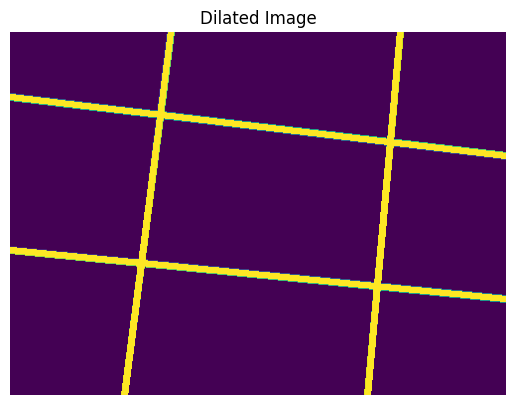

In [1100]:


def extend_line(x1, y1, x2, y2, img_shape):
    """Extend a line segment to the borders of the image."""
    height, width = img_shape[:2]
    dx = x2 - x1
    dy = y2 - y1

    if dx == 0:
        return [(x1, 0), (x1, height)]
    
    slope = dy / dx
    intercept = y1 - slope * x1

    def get_line_endpoints():
        endpoints = []
        x_top = (0 - intercept) / slope
        if 0 <= x_top < width:
            endpoints.append((int(x_top), 0))

        x_bottom = (height - intercept) / slope
        if 0 <= x_bottom < width:
            endpoints.append((int(x_bottom), height))

        y_left = intercept
        if 0 <= y_left < height:
            endpoints.append((0, int(y_left)))

        y_right = slope * width + intercept
        if 0 <= y_right < height:
            endpoints.append((width, int(y_right)))

        return endpoints

    endpoints = get_line_endpoints()
    if len(endpoints) == 2:
        return endpoints
    else:
        return []

# Create a new image for the extended lines
extended_line_image = np.copy(dilated_edges) * 0

# List to store extended lines
extended_lines = []

# Extend each detected line segment to the image borders
for line in formatted_lines:
    (x1, y1), (x2, y2) = line  # Correct unpacking for the format
    extended_points = extend_line(x1, y1, x2, y2, dilated_edges.shape)
    if len(extended_points) == 2:
        (x1_new, y1_new), (x2_new, y2_new) = extended_points
        extended_lines.append(((x1_new, y1_new), (x2_new, y2_new)))
        cv2.line(extended_line_image, (x1_new, y1_new), (x2_new, y2_new), (255, 0, 0), 3)

print("Extended lines:", extended_lines)

# Overlay the extended lines on the original image
lines_edges = cv2.addWeighted(dilated_edges, 0.8, extended_line_image, 1, 0)

# Function to show images (assuming you have it defined)
showImage("Extended Lines", extended_line_image, cmap='gray')

def draw_lines_on_black_image(lines, img_shape, color=(0, 255, 0), thickness=2):
    """Draw lines on a black background image."""
    # Create a black image
    black_image = np.zeros((img_shape[0], img_shape[1], 3), dtype=np.uint8)
    
    # Draw each line on the black image
    for (x1, y1), (x2, y2) in lines:
        cv2.line(black_image, (x1, y1), (x2, y2), color, thickness)
    
    return black_image

# Invert the extended line image
_, extended_line_image_inv = cv2.threshold(extended_line_image, 127, 255, cv2.THRESH_BINARY_INV)
showImage("Inverted Extended Lines", extended_line_image_inv)

kernelbig = np.ones((3, 3), np.uint8)

# Apply dilation (not erosion as your comment suggests)
eroded_image = cv2.dilate(extended_line_image, kernelbig, iterations=1)
showImage("Dilated Image", eroded_image)


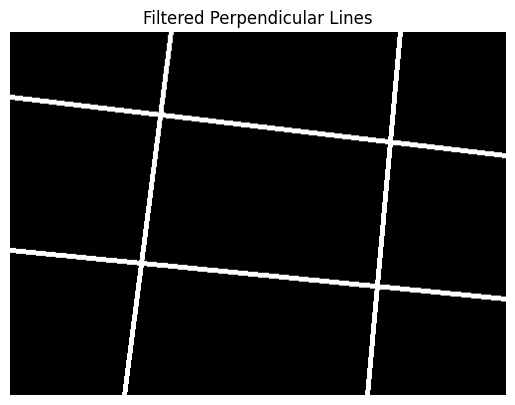

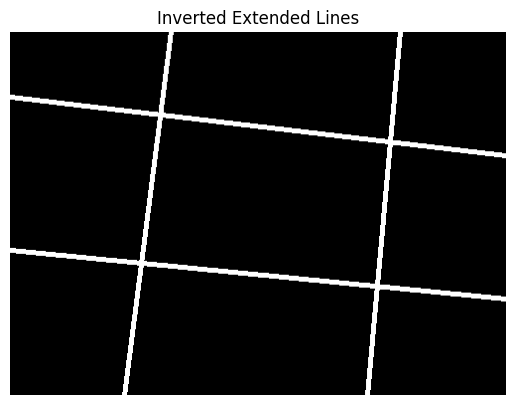

In [1101]:
def calculate_angle(line1, line2):
    """Calculate the angle between two lines in degrees."""
    (x1, y1), (x2, y2) = line1
    (x3, y3), (x4, y4) = line2
    
    # Calculate the slopes
    slope1 = np.arctan2((y2 - y1), (x2 - x1))
    slope2 = np.arctan2((y4 - y3), (x4 - x3))
    
    # Calculate the angle in radians and convert to degrees
    angle = np.abs(np.degrees(slope1 - slope2))
    
    # Normalize the angle to the range [0, 180]
    if angle > 180:
        angle = 360 - angle
    
    return angle

def is_perpendicular(line1, line2, tolerance=10):
    """Check if two lines are perpendicular within a tolerance."""
    angle = calculate_angle(line1, line2)
    return 90 - tolerance <= angle <= 90 + tolerance

def filter_perpendicular_lines(lines, tolerance=10):
    """Filter lines to keep only perpendicular pairs."""
    perpendicular_lines = []
    for i in range(len(lines)):
        for j in range(i + 1, len(lines)):
            if is_perpendicular(lines[i], lines[j], tolerance):
                perpendicular_lines.append(lines[i])
                perpendicular_lines.append(lines[j])
    
    # Remove duplicates
    perpendicular_lines = list(set(perpendicular_lines))
    return perpendicular_lines

# Filter lines for perpendicularity
filtered_lines = filter_perpendicular_lines(extended_lines, tolerance=21)

# Draw filtered lines on a black background
filtered_line_image = draw_lines_on_black_image(filtered_lines, dilated_edges.shape,(255, 255, 255), 3)
showImage("Filtered Perpendicular Lines", filtered_line_image)
_, extended_line_image_inve = cv2.threshold(filtered_line_image, 127, 255, cv2.THRESH_BINARY)
# gray = cv2.cvtColor(filtered_line_image, cv2.COLOR_BGR2GRAY)
showImage("Inverted Extended Lines", extended_line_image_inve )




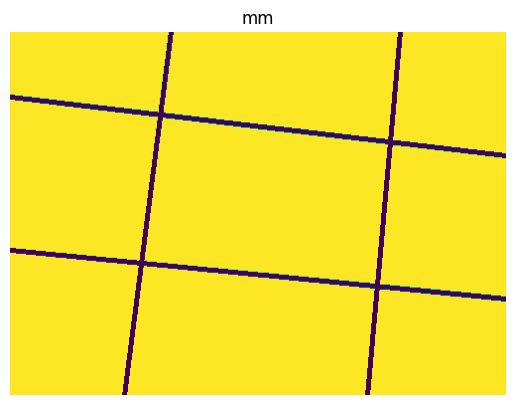

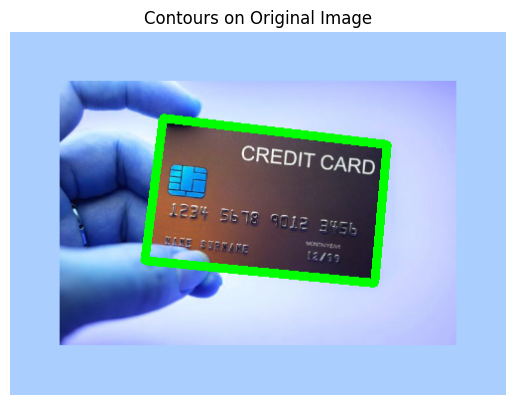

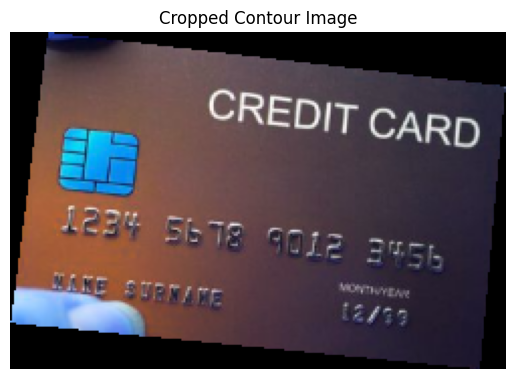

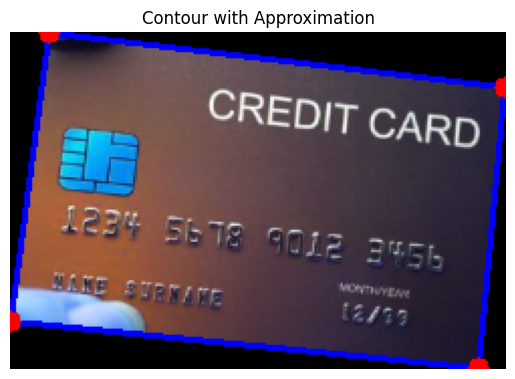

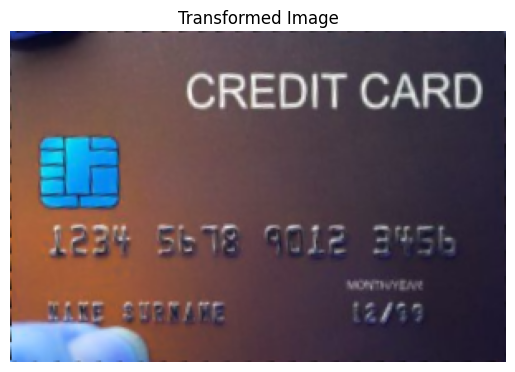

In [1102]:
def prepare_image_for_contours(image):
    if len(image.shape) == 3:
        # Convert to grayscale if the image has multiple channels
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    # Ensure the image is of type uint8
    if gray_image.dtype != np.uint8:
        gray_image = cv2.convertScaleAbs(gray_image)

    return gray_image



# inverted_image = cv2.bitwise_not(extended_line_image)
# showImage("mm",inverted_image)
inverted_imagea = prepare_image_for_contours(cv2.bitwise_not(filtered_line_image))
showImage("mm",inverted_imagea)
def find_contours(image):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
    if len(sorted_contours) > 0:
        return sorted_contours[0]
    else:
        print("No contours found.")
        return None

def draw_contours_on_image(contour, image):
    if contour is not None:
        image_with_contours = image.copy()
        cv2.drawContours(image_with_contours, [contour], -1, (0, 255, 0), 7)
        return image_with_contours
    else:
        return image

def crop_contour_from_image(image, contour):
    if contour is not None:
        mask = np.zeros(image.shape[:2], dtype=np.uint8)
        cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)
        result = cv2.bitwise_and(image, image, mask=mask)
        x, y, w, h = cv2.boundingRect(contour)
        cropped_contour_image = result[y:y+h, x:x+w]
        return cropped_contour_image, (x, y, w, h)
    else:
        return image, None

def approximate_and_draw_contour(cropped_image, contour, rect):
    if contour is not None:
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        
        if len(approx) > 0:
            # Adjust approximation points based on the cropping rectangle
            approx = np.array([[pt[0][0] - rect[0], pt[0][1] - rect[1]] for pt in approx])
            
            # Draw the approximated contour on the cropped image
            contour_image = cropped_image.copy()
            cv2.drawContours(contour_image, [approx], -1, (0, 0, 255), 2)  # Red color in BGR
            
            # Draw the points of the approximated contour
            for point in approx:
                cv2.circle(contour_image, tuple(point), 5, (255, 0, 0), -1)  # Blue color in BGR
            
            return contour_image, approx
        else:
            return cropped_image, None
    else:
        return cropped_image, None

def perspective_transform(image, points, dst_size=(300, 200)):
    if len(points) == 4:
        # Ensure points are in the correct order: top-left, top-right, bottom-right, bottom-left
        rect = order_points(points)
        
        # Define the destination points
        width, height = dst_size
        pts2 = np.array([
            [0, 0],
            [width - 1, 0],
            [width - 1, height - 1],
            [0, height - 1]
        ], dtype='float32')

        # Compute the perspective transform matrix
        matrix = cv2.getPerspectiveTransform(rect, pts2)

        # Apply the perspective transform
        transformed_image = cv2.warpPerspective(image, matrix, (width, height))
        return transformed_image
    else:
        print("Not enough points for perspective transformation.")
        return image

def order_points(points):
    # Initialize a list of coordinates that will be ordered as:
    # top-left, top-right, bottom-right, bottom-left
    rect = np.zeros((4, 2), dtype='float32')

    # Sort the points based on their x-coordinates
    x_sorted = points[np.argsort(points[:, 0]), :]

    # Select the left-most and right-most points
    left_most = x_sorted[:2, :]
    right_most = x_sorted[2:, :]

    # Now sort the left-most points based on their y-coordinates to determine the top-left and bottom-left
    left_most = left_most[np.argsort(left_most[:, 1]), :]
    rect[0] = left_most[0]  # top-left
    rect[3] = left_most[1]  # bottom-left

    # Sort the right-most points based on their y-coordinates to determine the top-right and bottom-right
    right_most = right_most[np.argsort(right_most[:, 1]), :]
    rect[1] = right_most[0]  # top-right
    rect[2] = right_most[1]  # bottom-right

    return rect

# Assuming 'inverted_image' and 'original_image' are defined earlier in your code
largest_contour = find_contours(inverted_imagea)
cropped_contour_image, rect = crop_contour_from_image(padded_image, largest_contour)
contour_with_approx, approx_points = approximate_and_draw_contour(cropped_contour_image, largest_contour, rect)

if approx_points is not None and len(approx_points) >= 4:
    # Ensure we have 4 points for perspective transformation
    pts = np.array(approx_points[:4], dtype='float32')
    transformed_image = perspective_transform(cropped_contour_image, pts)

    # Display results
    showImage("Contours on Original Image", draw_contours_on_image(largest_contour, padded_image))
    showImage("Cropped Contour Image", cropped_contour_image)
    showImage("Contour with Approximation", contour_with_approx)
    showImage("Transformed Image", transformed_image)
else:
    print("Insufficient points for perspective transformation.")

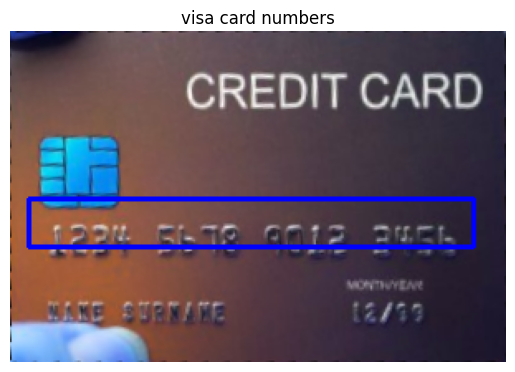

In [1103]:
# Define the bounding box for the card number area (hardcoded)
# Assuming the card number area is centered and occupies the lower third of the card
box_top_left = (11, 101)  # (x, y) coordinate of the top-left corner of the box
box_bottom_right = (280, 130)  # (x, y) coordinate of the bottom-right corner of the box
tranformedCopy=transformed_image.copy()
# Draw the bounding box around the card number area
cv2.rectangle(tranformedCopy, box_top_left, box_bottom_right, (0, 0, 255), 2)  # Red bounding box

showImage("visa card numbers",tranformedCopy)

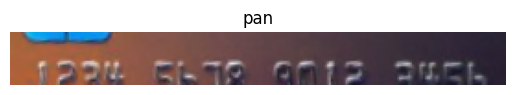

In [1104]:
pan = transformed_image[box_top_left[1]:box_bottom_right[1], box_top_left[0]:box_bottom_right[0]]

showImage("pan",pan)

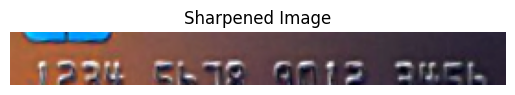

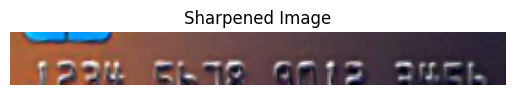

In [1105]:
# Apply Gaussian blur to the image
blurred = cv2.GaussianBlur(pan, (9, 9), 10.0)

# Subtract the blurred image from the original image to create the mask
sharpened = cv2.addWeighted(pan, 1.5, blurred, -0.5, 0)


showImage('Sharpened Image', sharpened)


resizedpan=resize_image(sharpened,900)
showImage('Sharpened Image', resizedpan)

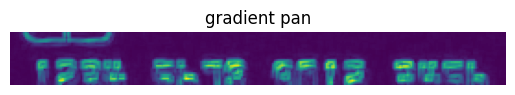

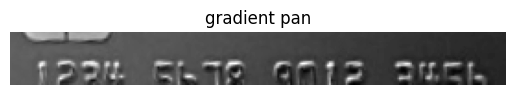

In [1106]:
gray_image = cv2.cvtColor(resizedpan, cv2.COLOR_BGR2GRAY)


kernel = np.ones((8, 8), np.uint8)  # You can adjust the kernel size
gradient = cv2.morphologyEx(gray_image, cv2.MORPH_GRADIENT, kernel)
# Apply Gaussian blur to the image
blurredg = cv2.GaussianBlur(gradient, (9, 9), 10.0)
showImage("gradient pan",gradient)
# Subtract the blurred image from the original image to create the mask
sharpenedg = cv2.addWeighted(gradient, 1.5, blurredg, -0.5, 0)
showImage("gradient pan",gray_image ,cmap="gray")





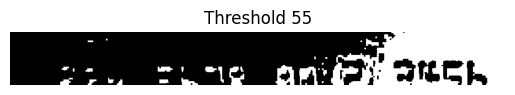

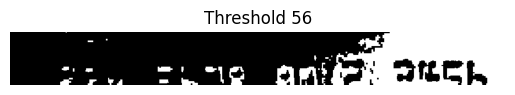

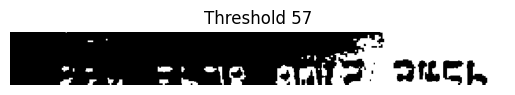

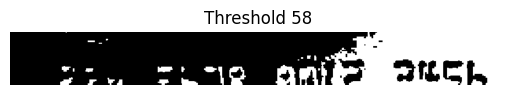

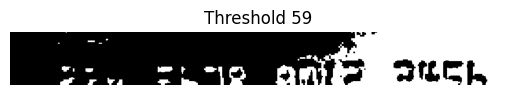

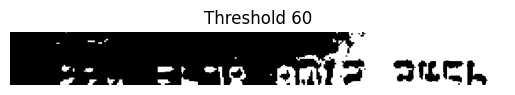

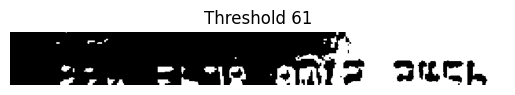

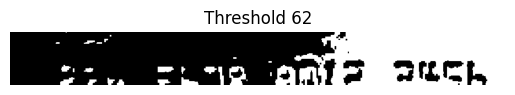

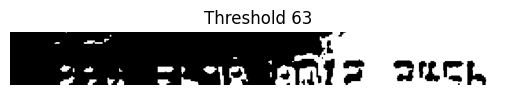

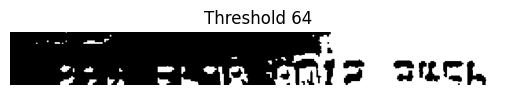

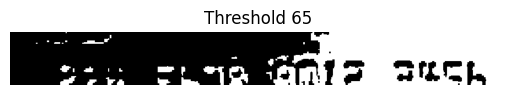

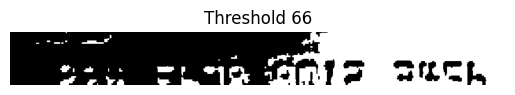

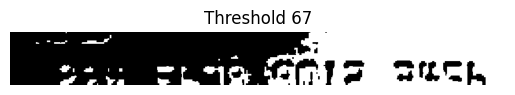

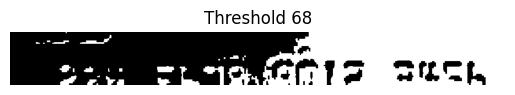

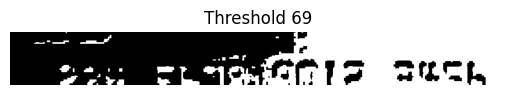

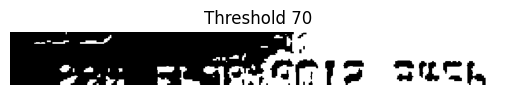

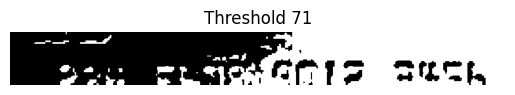

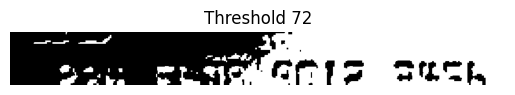

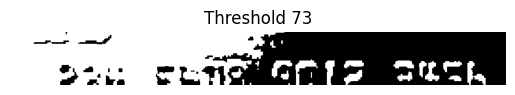

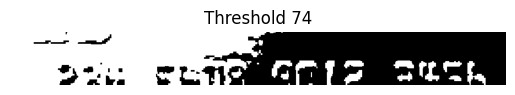

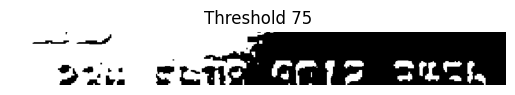

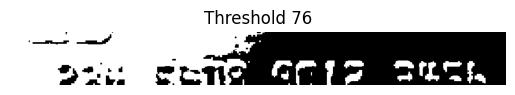

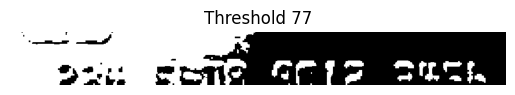

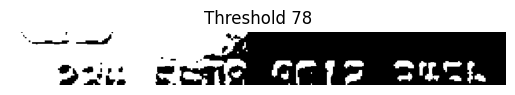

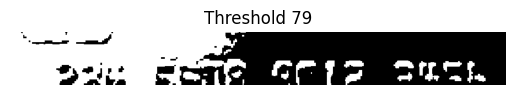

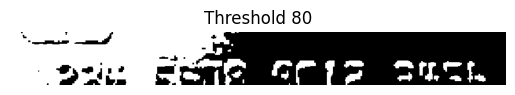

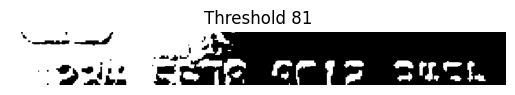

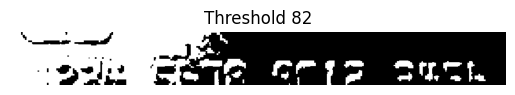

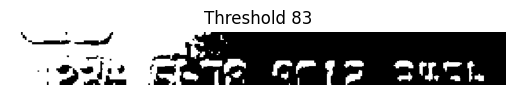

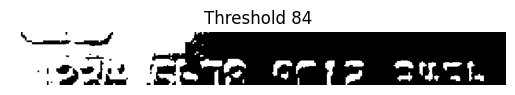

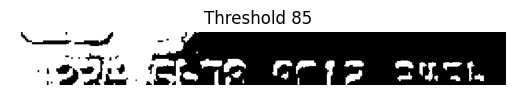

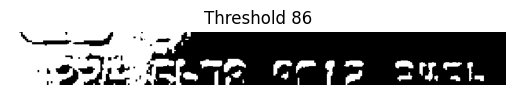

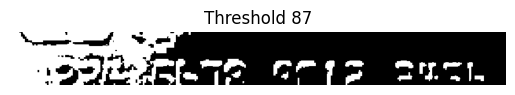

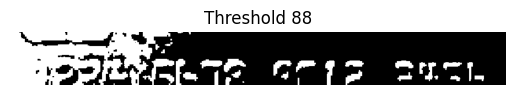

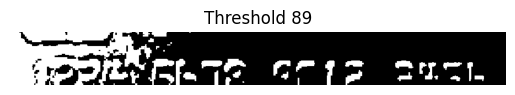

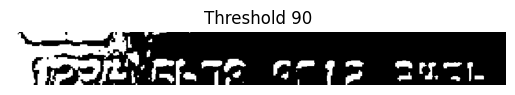

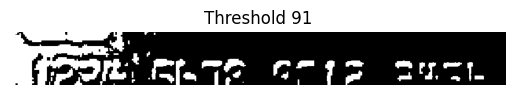

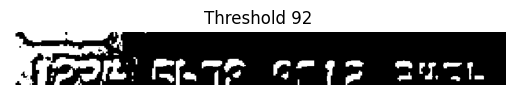

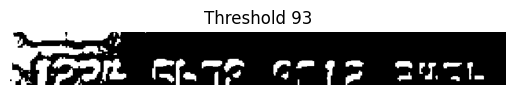

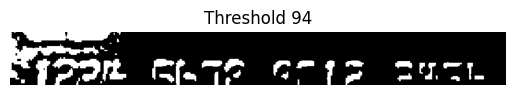

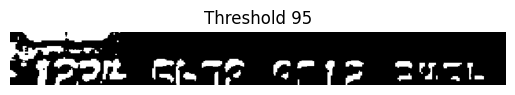

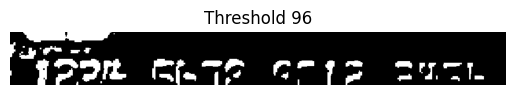

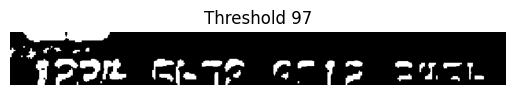

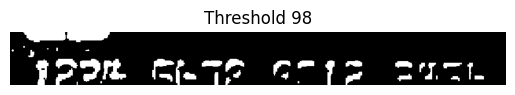

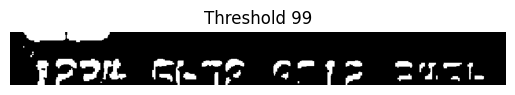

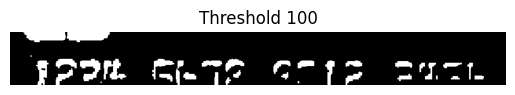

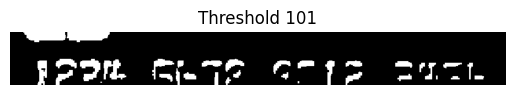

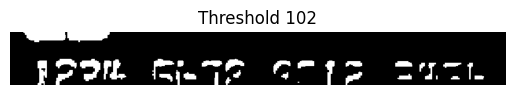

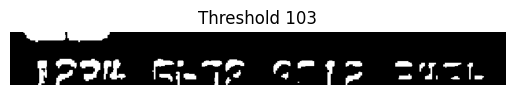

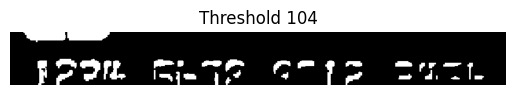

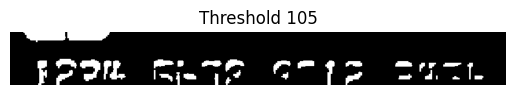

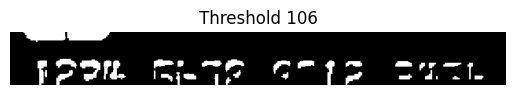

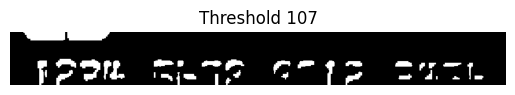

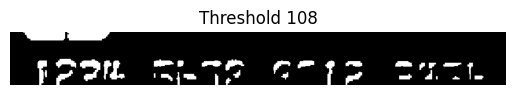

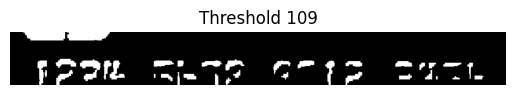

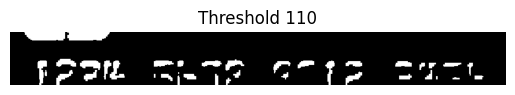

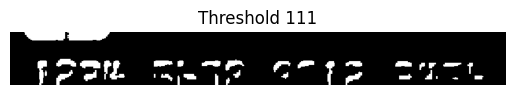

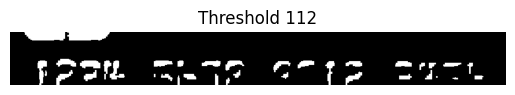

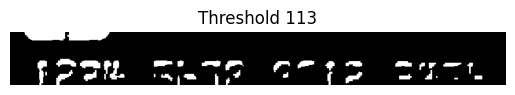

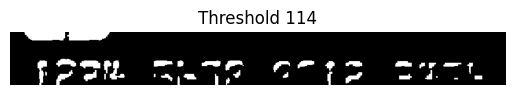

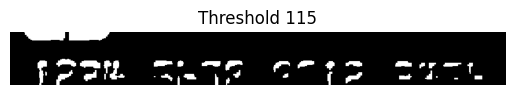

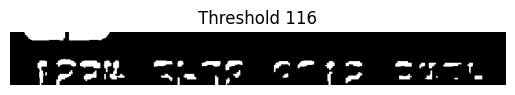

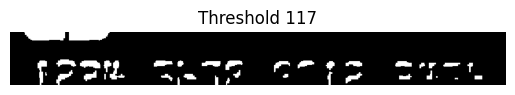

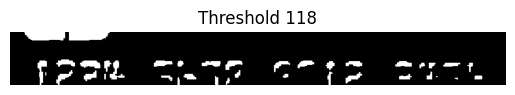

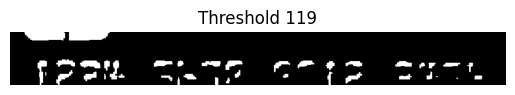

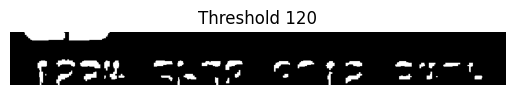

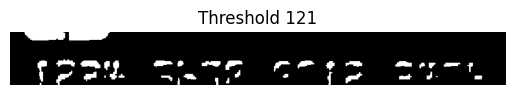

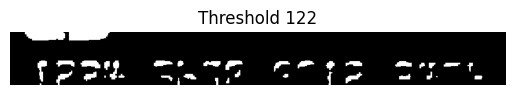

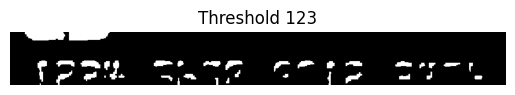

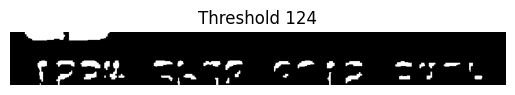

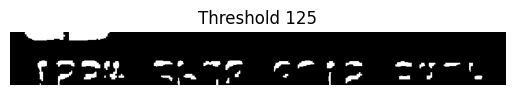

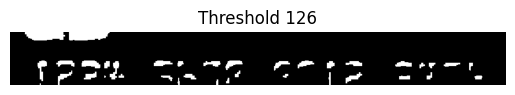

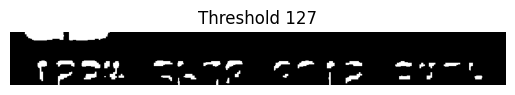

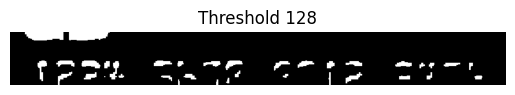

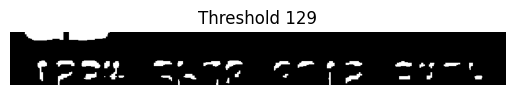

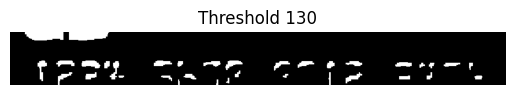

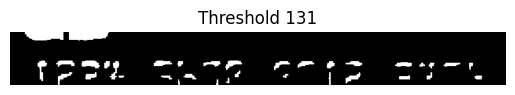

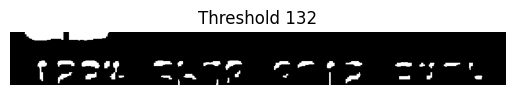

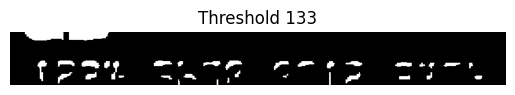

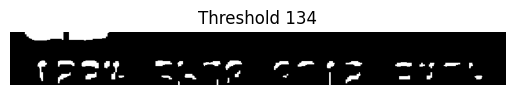

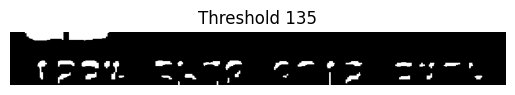

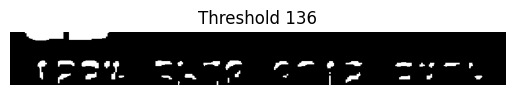

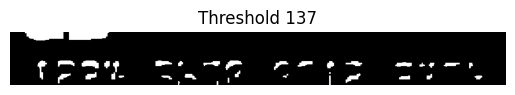

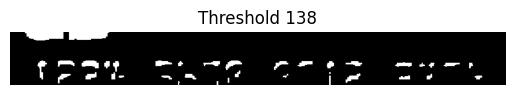

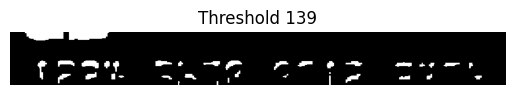

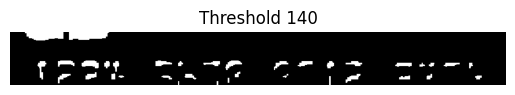

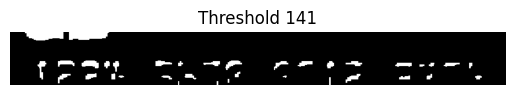

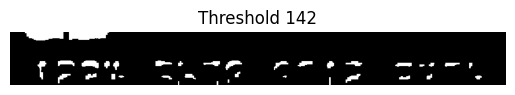

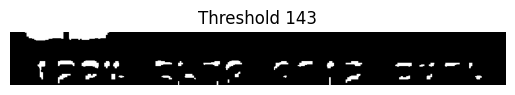

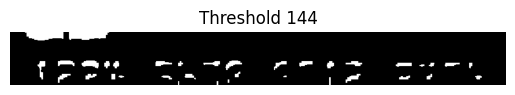

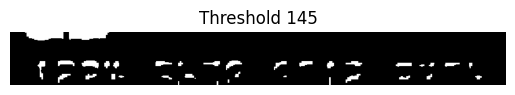

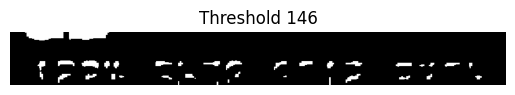

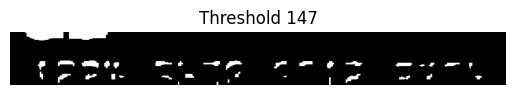

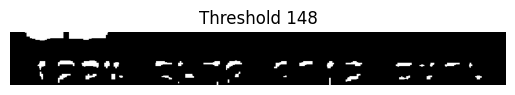

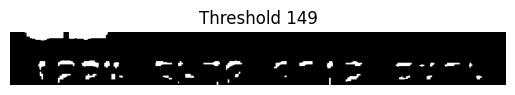

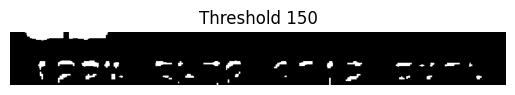

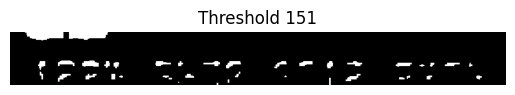

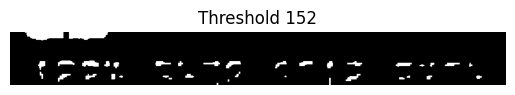

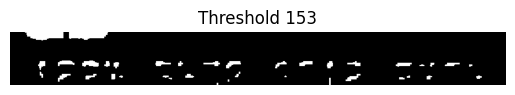

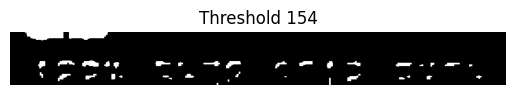

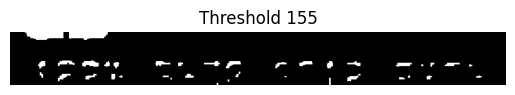

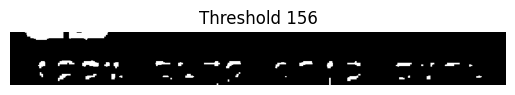

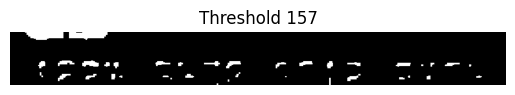

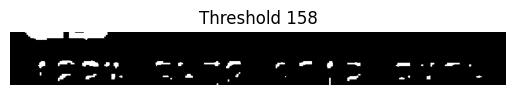

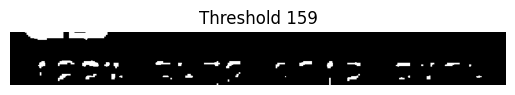

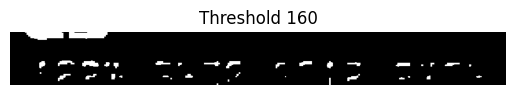

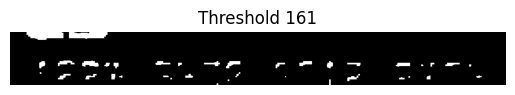

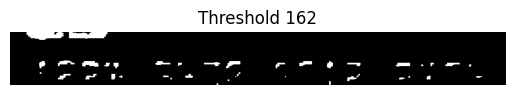

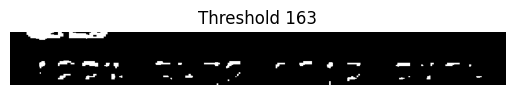

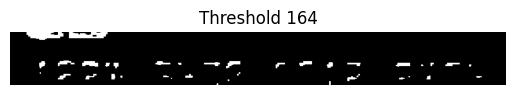

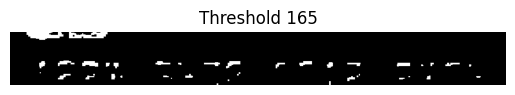

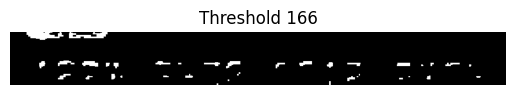

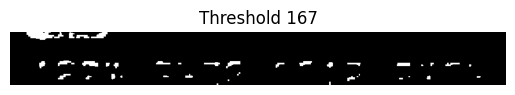

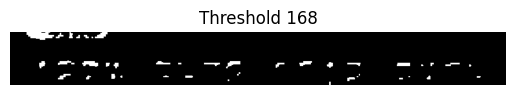

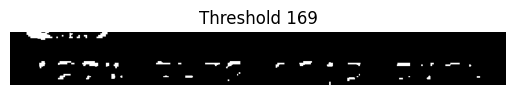

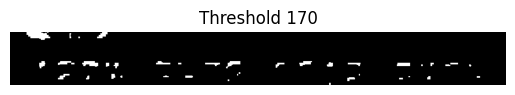

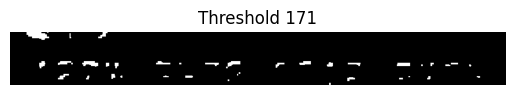

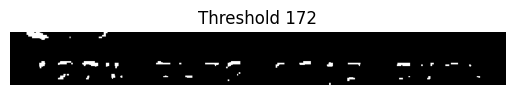

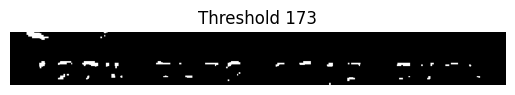

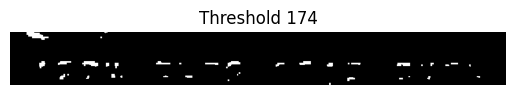

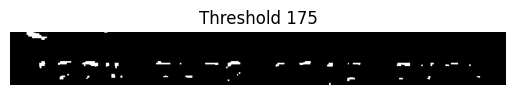

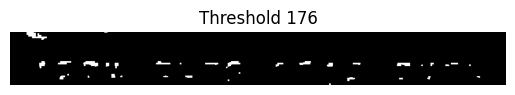

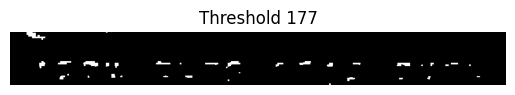

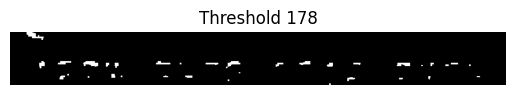

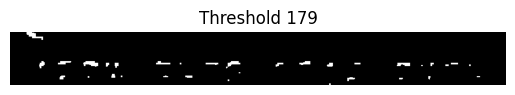

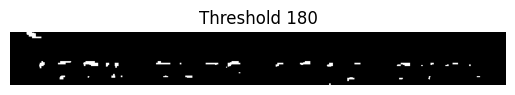

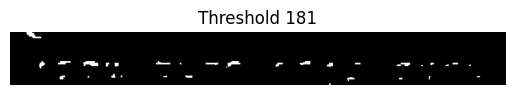

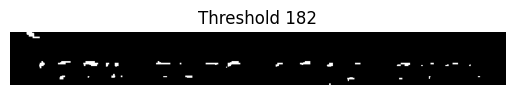

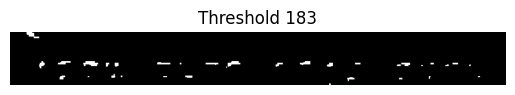

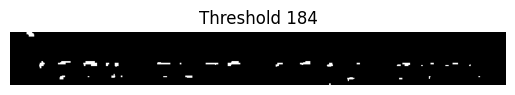

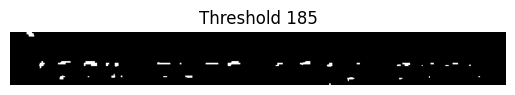

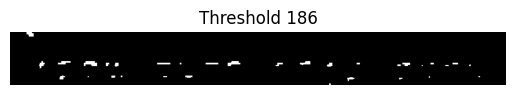

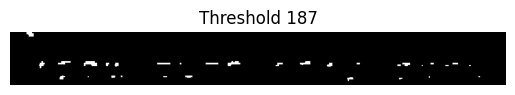

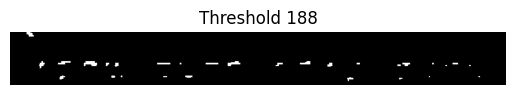

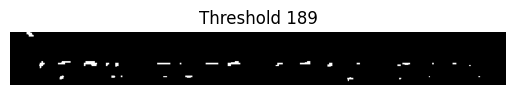

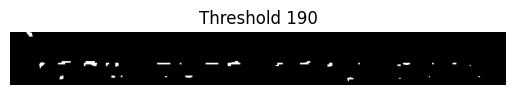

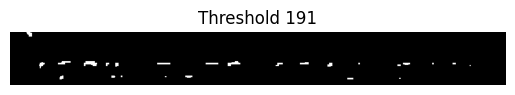

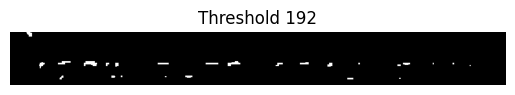

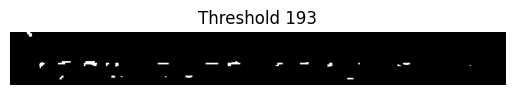

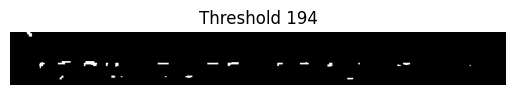

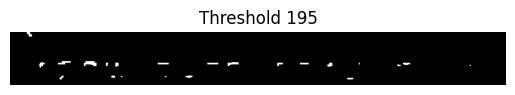

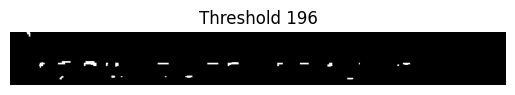

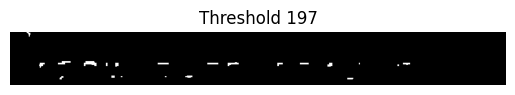

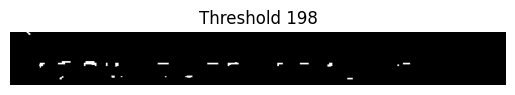

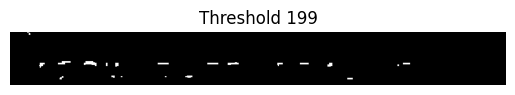

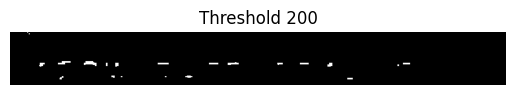

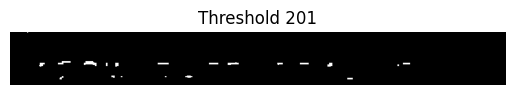

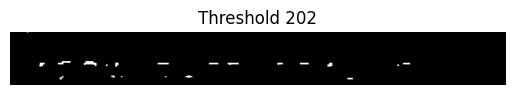

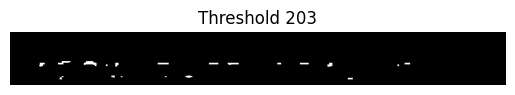

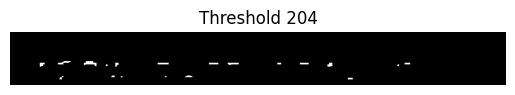

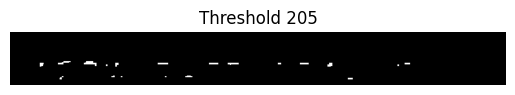

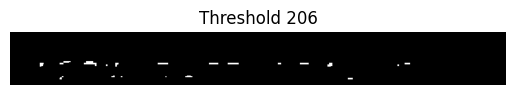

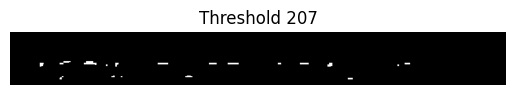

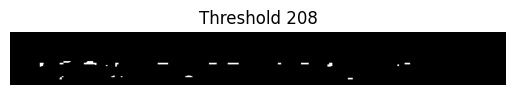

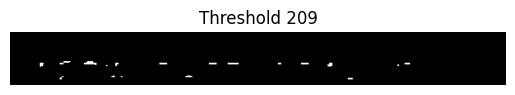

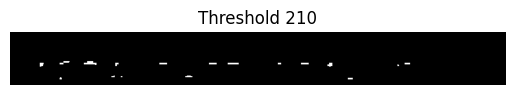

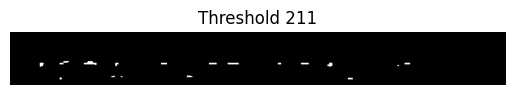

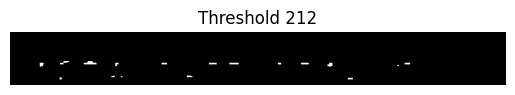

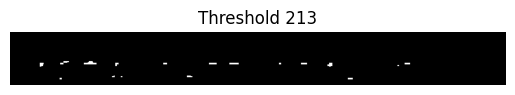

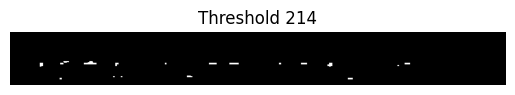

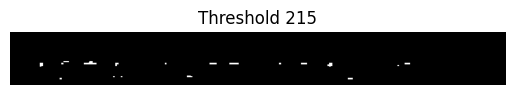

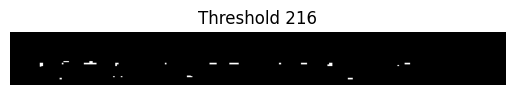

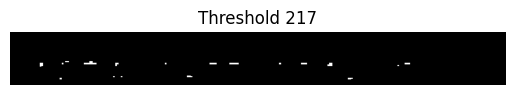

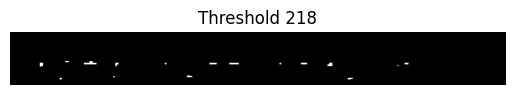

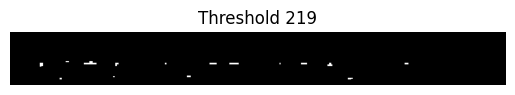

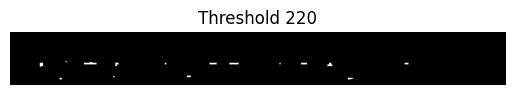

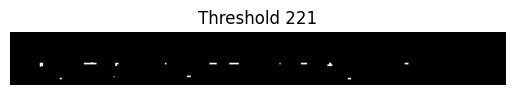

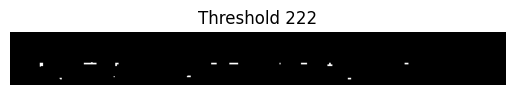

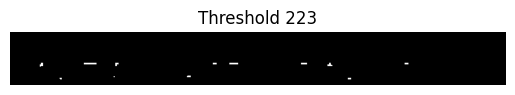

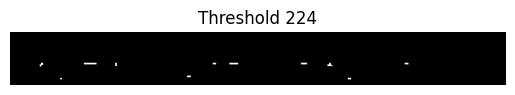

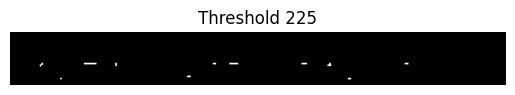

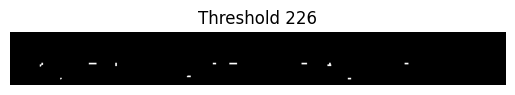

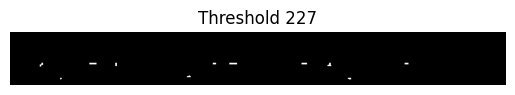

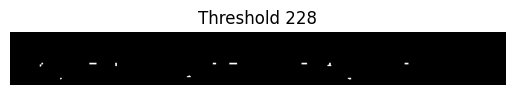

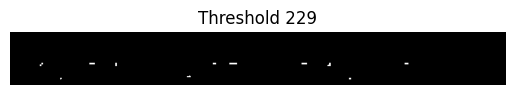

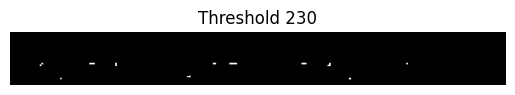

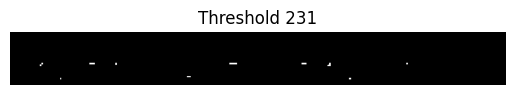

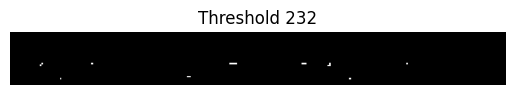

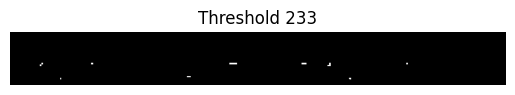

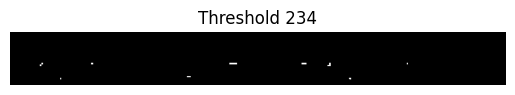

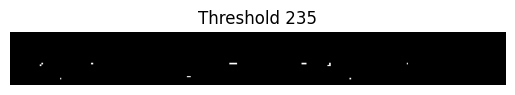

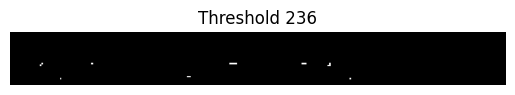

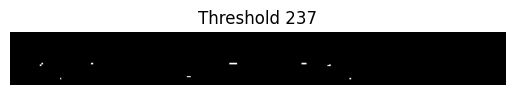

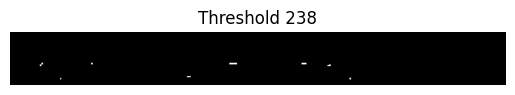

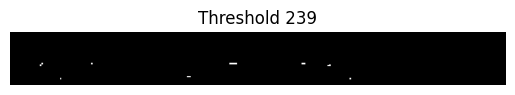

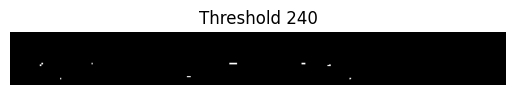

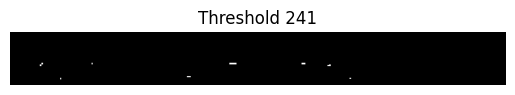

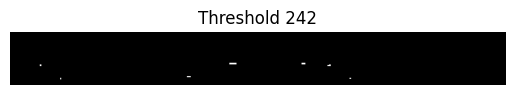

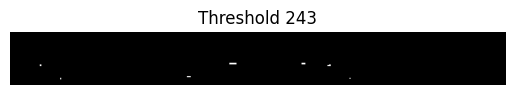

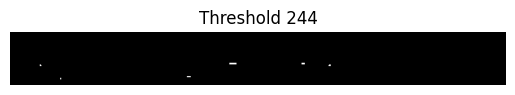

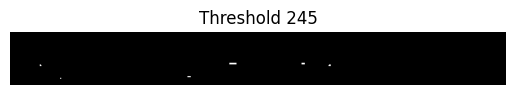

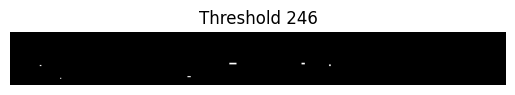

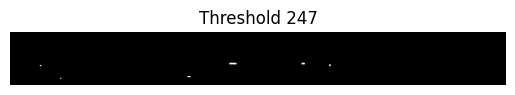

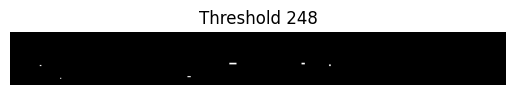

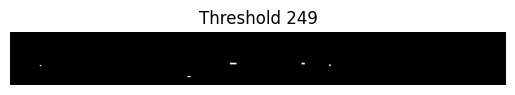

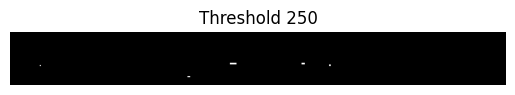

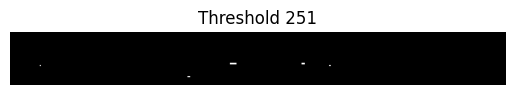

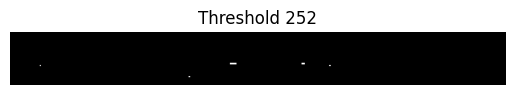

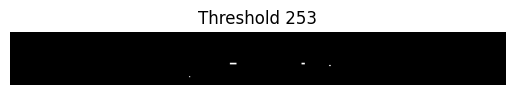

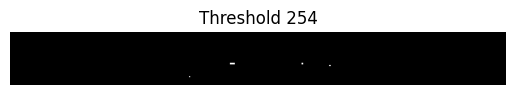

No valid credit card number detected within the threshold range.


In [1107]:
import cv2
import imutils
import numpy as np
from imutils import contours
from matplotlib import pyplot as plt

def compare_white_black(img):
    white_count = cv2.countNonZero(img)
    black_count = img.size - white_count  # Count of black pixels (0)
    return white_count > black_count

def showImage(name, image, cmap=None):
    plt.imshow(image, cmap=cmap)
    plt.axis('off')  # Hide axis
    plt.title(name)
    plt.show()

FIRST_NUMBER = {
    "3": "American Express",
    "4": "Visa",
    "5": "MasterCard",
    "6": "Discover Card"
}

# Load the reference image of the digits
ref = cv2.imread('Credit-Card0.png')
ref = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)
ref = cv2.threshold(ref, 10, 255, cv2.THRESH_BINARY_INV)[1]

# Find contours in the reference image
refCnts = cv2.findContours(ref.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
refCnts = imutils.grab_contours(refCnts)
refCnts = contours.sort_contours(refCnts, method="left-to-right")[0]
digits = {}

# Store each digit's region of interest (ROI)
for (i, c) in enumerate(refCnts):
    (x, y, w, h) = cv2.boundingRect(c)
    roi = ref[y:y + h, x:x + w]
    roi = cv2.resize(roi, (57, 88))
    digits[i] = roi

def process_image(image, threshold_value):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    group = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY_INV)[1]
    
    if compare_white_black(group):
        group = cv2.bitwise_not(group)
    
    filtered_image = cv2.medianBlur(group, 5)

    kernel = np.ones((5, 5), np.uint8)
    eroded = cv2.erode(group, kernel, iterations=1)
    dilated = cv2.dilate(eroded, kernel, iterations=1)

    (h, w) = group.shape[:2]
    part_width = w // 4
    part_outputs = []

    for i in range(4):
        start_x = i * part_width
        end_x = (i + 1) * part_width
        roi = filtered_image[:, start_x:end_x]
        
        # Find contours in the current part
        digitCnts = cv2.findContours(roi.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        digitCnts = imutils.grab_contours(digitCnts)

        # Filter out very small contours
        min_contour_area = 200
        min_contour_width = 70
        min_contour_length = 20
        filteredCnts = [c for c in digitCnts if cv2.contourArea(c) > min_contour_area and cv2.boundingRect(c)[2] < min_contour_width and cv2.boundingRect(c)[3] > min_contour_length]

        # Show contours for each part
        part_contours_image = roi.copy()
        cv2.drawContours(part_contours_image, filteredCnts, -1, (0, 255, 0), 2)
        
        if filteredCnts:
            filteredCnts = contours.sort_contours(filteredCnts, method="left-to-right")[0]
        else:
            part_outputs.append([])
            continue

        part_output = []

        for c in filteredCnts:
            (x, y, w, h) = cv2.boundingRect(c)
            digit_roi = roi[y:y + h, x:x + w]
            digit_roi = cv2.resize(digit_roi, (57, 88))
            scores = []

            for (digit, digitROI) in digits.items():
                result = cv2.matchTemplate(digit_roi, digitROI, cv2.TM_CCOEFF)
                (_, score, _, _) = cv2.minMaxLoc(result)
                scores.append(score)

            part_output.append(str(np.argmax(scores)))
        
        part_outputs.append(part_output)

    return group, part_outputs

# Load the input image
image = resizedpan

# Store detected numbers for comparison
detected_numbers = {i: [] for i in range(4)}

for threshold in range(55, 255):  # Adjust the threshold range as needed
    thresholded_image, part_outputs = process_image(image.copy(), threshold)
    
    # Show the thresholded image
    showImage(f"Threshold {threshold}", thresholded_image, cmap="gray")

    for i in range(4):
        if len(part_outputs[i]) == 4:
            detected_numbers[i].append(''.join(part_outputs[i]))
        
        # # Check if the list is non-empty before accessing the last element
        # if detected_numbers[i] and detected_numbers[i].count(detected_numbers[i][-1]) == 6:
        #     print(f"Part {i + 1} detected consistently 6 times: {detected_numbers[i][-1]}")
    
    # Check if all parts have been detected 6 times
    if all(len(detected_numbers[i]) >= 5 for i in range(4)):#8
        full_number = ''.join([detected_numbers[i][-1] for i in range(4)])
        print(f"Detected Credit Card Number: {full_number}")
        showImage("Detected Contours", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        break
else:
    print("No valid credit card number detected within the threshold range.")
